In [2]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import json

# Helper functions

In [47]:
def get_cutout_meta(path):
        with open(path) as f:
            j = json.load(f)
        return j

def meta2yolo_prep(jsonpath, imgpath):
    """Operates on a single json file. Creates a dictionary that contains the image path, class id, and bounding box coordinates. Used later in another function.

    Args:
        jsonpath (str): path to json file
        imgpath (str): path to image
    """
    # Create a list of dictionaries with img paths and all bboxes
    meta = get_cutout_meta(jsonpath)
    cutouts = meta["cutouts"]
    cuts = []
    for cutout in cutouts:
        cls_id = cutout["cls"]["class_id"]
        cuts.append(cutout["synth_norm_xywh"])
    data_dict = {"img_path": imgpath, "bbox": cuts, "cls_id": cls_id}
    return data_dict

def metadata2yolo_labels(datadir, data):
    """Creates YoloV... formatted label text files from metadata dictionary. Saves to data directory location.

    Args:
        datadir (str): path to where labels will be saved
        data (dict): dictionary that contains image name, class_id, and list of bboxes
    """
    savedir = Path(datadir, "yolo_labels")
    savedir.mkdir(exist_ok=True, parents=True)

    for i in data:
        txt_path = Path(savedir, Path(i["img_path"]).stem + ".txt")
        lines = []
        cls_id = i["cls_id"]
        for bounding_box in i["bbox"]:
            line = [round(x, 8) for x in bounding_box]
            line.insert(0, cls_id)
            s = " ".join(map(str, line))
            lines.append(s)
        with open(txt_path, 'w') as f:
            f.writelines([f"{line}\n" for line in lines])

# Load data

In [48]:
datadir = "/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results"
jsonpaths = sorted(list(Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results/metadata").glob("*.json")))
imgpaths =  sorted(list(Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results/images").glob("*.png")))


data = []
for imgp, jsonp in zip(imgpaths, jsonpaths):
    data.append(meta2yolo_prep(jsonp, imgp))

## Show some images

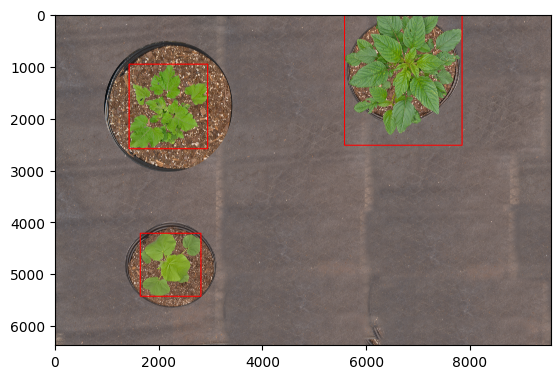

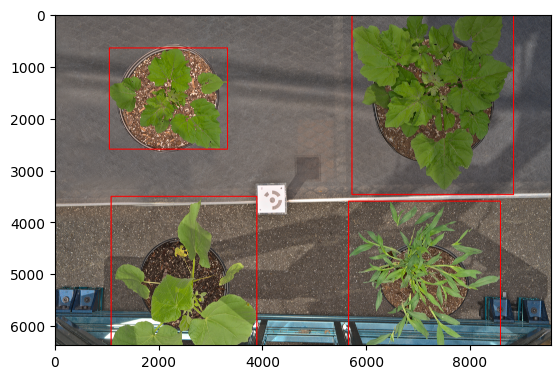

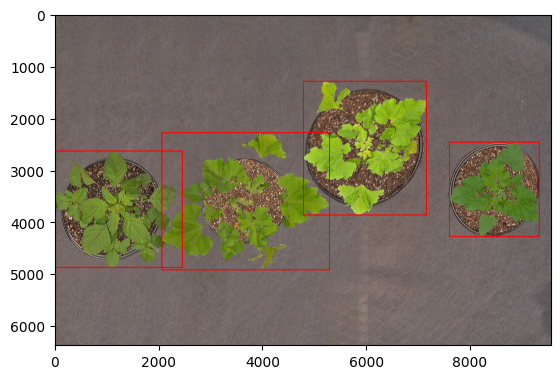

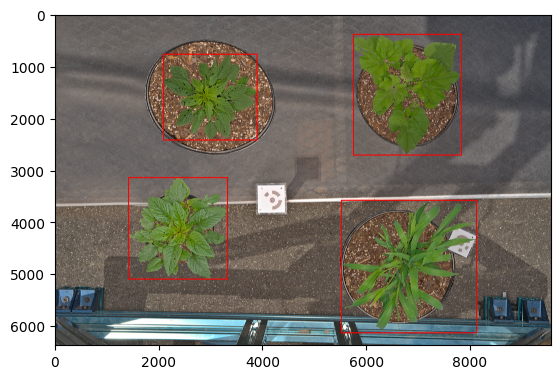

In [15]:
for i in data:
    imgp = i["img_path"]
    img = cv2.imread(str(imgp))
    im_hw = img.shape[:2]
    for bounding_box in i["bbox"]:
        x0 = bounding_box[0] * im_hw[1]
        x1 = (bounding_box[0] * im_hw[1])+ bounding_box[2]* im_hw[1]
        y0 = bounding_box[1]* im_hw[0]
        y1 = (bounding_box[1]  * im_hw[0]) + bounding_box[3]* im_hw[0]
        
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        cv2.rectangle(img, start_point, end_point, color=(0,0,255), thickness=20)
    
    # cv2.imwrite("example_with_bounding_boxes.jpg", img)
    cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cvt_img)
    plt.show()

# Convert to text files

class x_center y_center width height 

In [51]:
metadata2yolo_labels(datadir, data)

In [52]:
data

[{'img_path': PosixPath('/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results/images/4af98dccfaa240e8b0c035f8dac0f6d5.png'),
  'bbox': [[0.1489539748953975,
    0.1515389447236181,
    0.15836820083682007,
    0.2551821608040201],
   [0.17144351464435145,
    0.6623743718592965,
    0.12217573221757322,
    0.19048366834170855],
   [0.5827405857740586, 0.0, 0.23619246861924686, 0.3965138190954774]],
  'cls_id': 1},
 {'img_path': PosixPath('/home/mkutuga/SemiF-SyntheticPipeline/data/projects/all_big_cutouts/results/images/50cad571dc504a0e89bcbf710e3e6dfb.png'),
  'bbox': [[0.10910041841004184,
    0.10254396984924623,
    0.23817991631799162,
    0.30574748743718594],
   [0.11276150627615063,
    0.551036432160804,
    0.29341004184100417,
    0.528109296482412],
   [0.597489539748954, 0.0, 0.3253138075313807, 0.5453831658291457],
   [0.5908995815899581,
    0.5654836683417085,
    0.3051255230125523,
    0.48115577889447236]],
  'cls_id': 5},
 {'img_path': PosixP